In [2]:
# Plot Systematics
# 
# Author: Felipe S.C.
# Email: felipesc.physis@gmail.com, @protonmail.com

import matplotlib.pyplot as plt
import healpy as hp

import glob
from natsort import natsorted
import os 
from configparser import ConfigParser

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Functions

## Getconfig 

In [3]:
def getconfig():
    '''
    Get the configuration file config.ini from above directories.
    Return: "path/config.ini" as string. 
    '''
    path = os.getcwd()
    pathSplit = path.split("/")

    for k in range(len(pathSplit)):
        path = "/".join(pathSplit[0:len(pathSplit)-k])
        configPath = glob.glob(path+"/*.ini")
        if len(configPath) !=0:
            break
            
    return configPath[0]

# Get parameters from config.ini 
ini = getconfig()
cfg = ConfigParser(inline_comment_prefixes="#")
cfg.read(ini)
config = dict(cfg.items('PARAMETERS'))

## Map plot

In [4]:
def plot(mapsPath:list, save=False, saveDir='./systematics'):
    for k in range(len(mapsPath)):
        # Size of figure plot
        fig = plt.figure(figsize=(figSize,figSize))

        # Loading map file.fits
        mapLoaded = hp.read_map(mapsPath[k])

        # Ploting map
        titleValue = mapsPath[k].split("/")[-1][len(config['sys_prefix']):-len(config['sys_sufix'])]
        hp.mollview(mapLoaded, xsize = xsizeValue, hold = holdValue, title=titleValue)
        
        if save:
            savePath = os.path.join(saveDir, str(titleValue+"."+formato))
            plt.savefig(savePath, format=formato)
        
        plt.show()
        plt.close()

In [5]:
def plotmatrixmaps(allPaths, save=False, savePath='', formato='png')->None:
    mapas = [hp.read_map(allPaths[k]) for k in range(len(allPaths))]

    n=int(config['nbins'])
    # List of maps
    # mapas = [hp.read_map(mapsPath[k]) for k in range(len(mapsPath))]

    # Ploting matrix
    # linhas = int(np.sqrt(n))
    # colunas = int(np.ceil(n / linhas))
    linhas = 5
    colunas = 2

    # Criar a figura e os subplots
    fig, axs = plt.subplots(linhas, colunas, figsize=(15, 15))

    if linhas*colunas > len(mapas):
        mapsPath.append(None)
        mapas.append(None)

    # maps subplot
    for i, mapa in enumerate(mapas):
        linha = i // colunas
        coluna = i % colunas
        plt.axes(axs[linha, coluna])
        plt.axes(axs[linha, coluna]).axis('off')

        titleValue = allPaths[i].split("/")[-1][len(config['sys_prefix']):-len(config['sys_sufix'])]
        hp.mollview(mapa, hold=True, title = titleValue)

    if save:
        plt.savefig(savePath, format=formato)

    # Ajusting space
    plt.tight_layout()

    plt.show()

# Plot systematics maps

In [ ]:
# Plot configuration

# Resolution:
xsizeValue = 800
figSize = 15
holdValue = True

In [23]:
# Systematics path
sysPath = natsorted(glob.glob(config['systematicsmaps']+'/*.fits'))

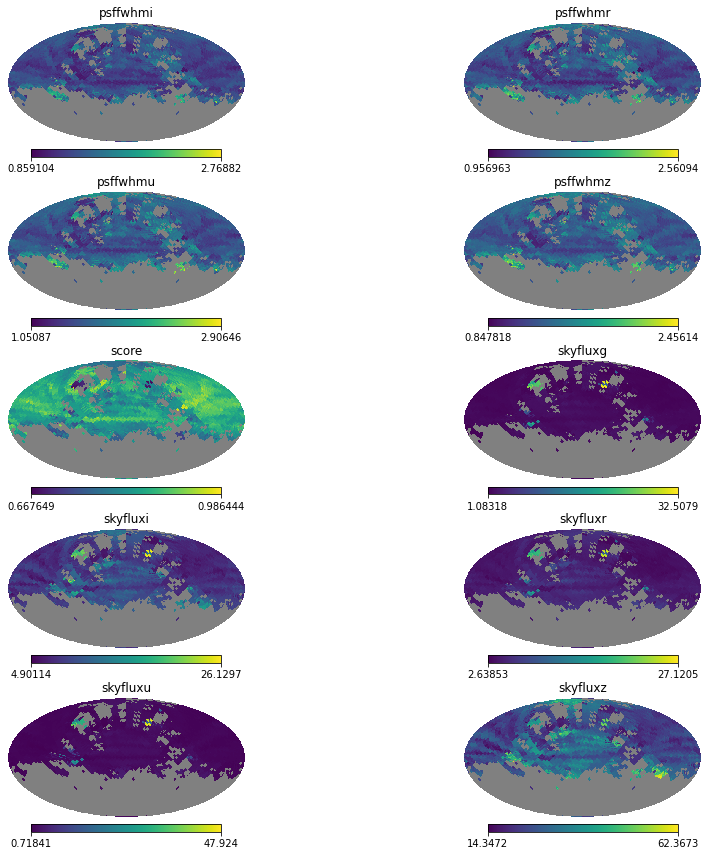

In [42]:
# save config
formato = 'png'
mkdirPath = "./systematics"
saveName ="MapMatrix"

os.system("mkdir -p " + mkdirPath)

path = os.path.join(mkdirPath, str(saveName+"."+formato))
# def plotmatrixmaps(allPaths, save=False, savePath='', formato='png')->None:
plotmatrixmaps(sysPath, save=False, savePath=path)

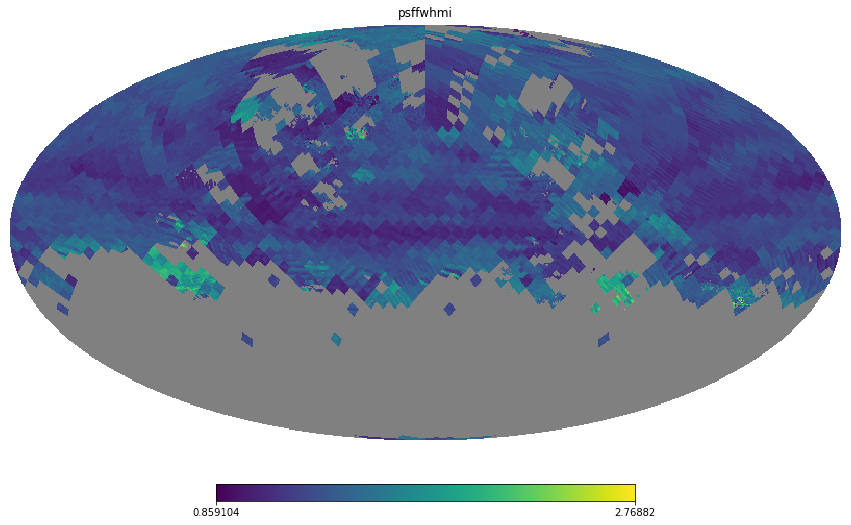

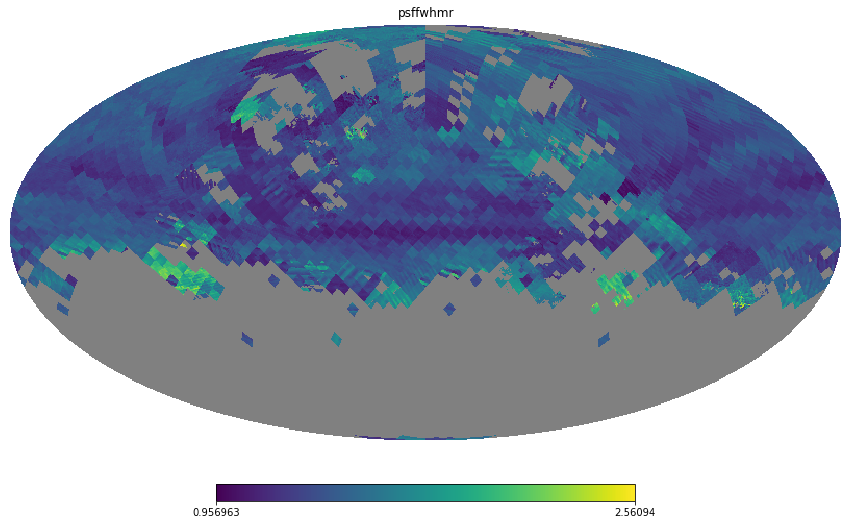

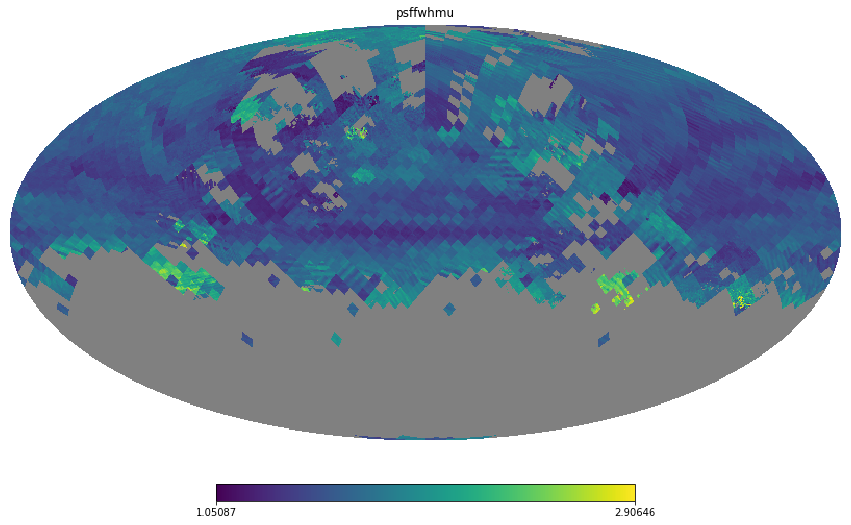

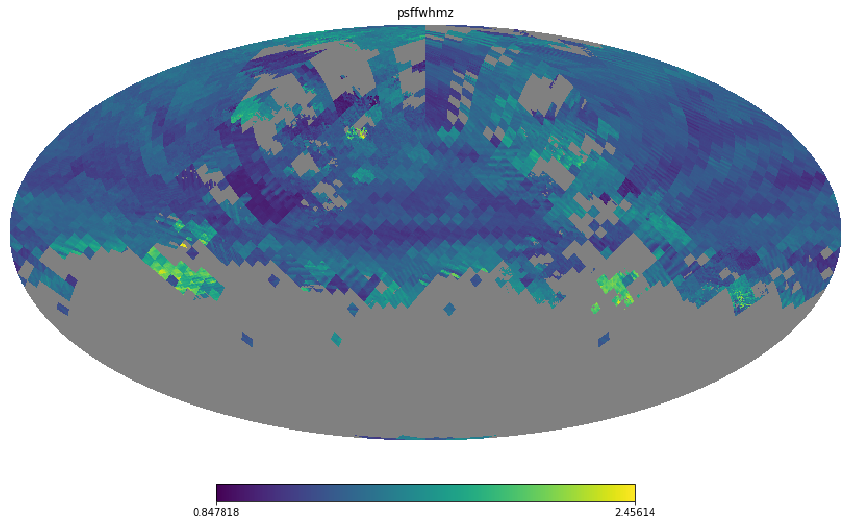

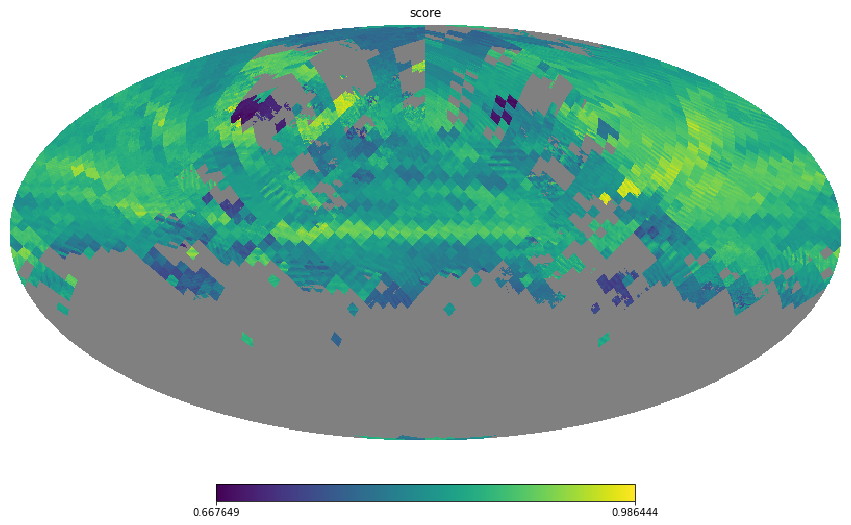

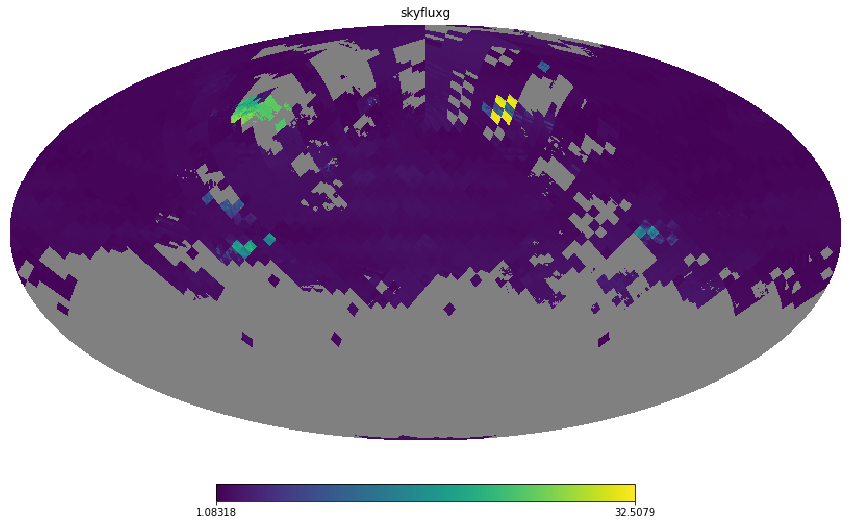

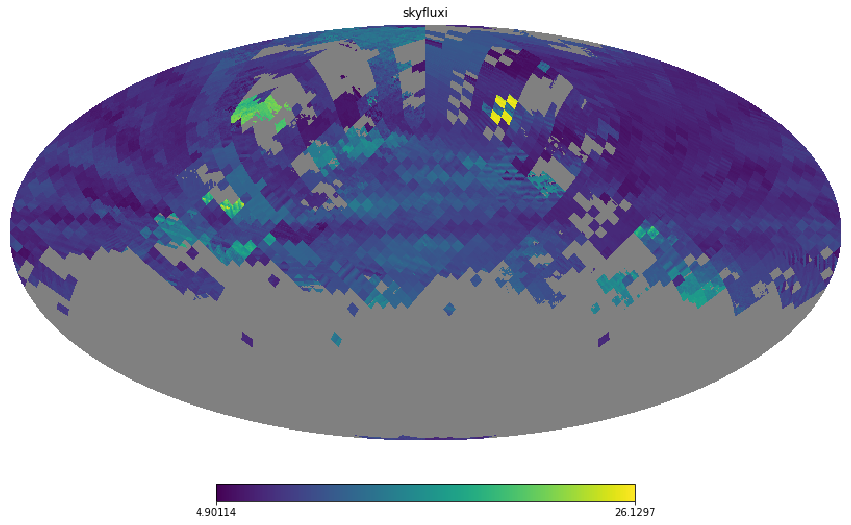

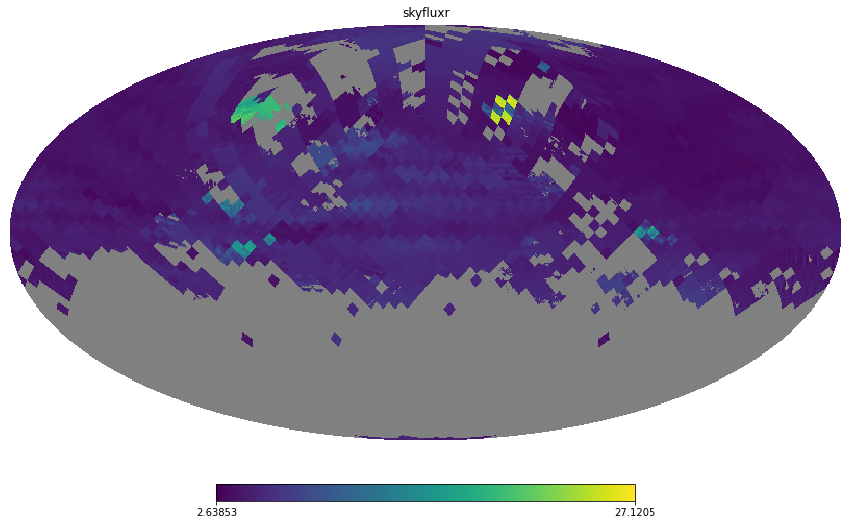

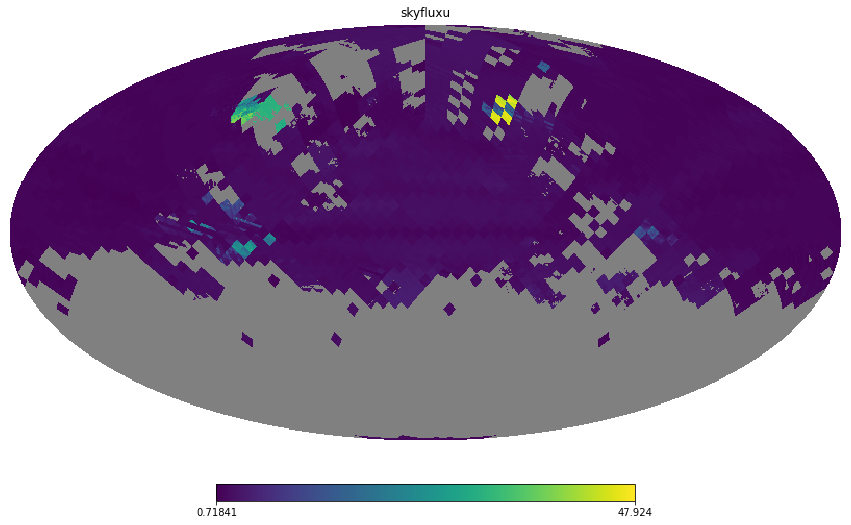

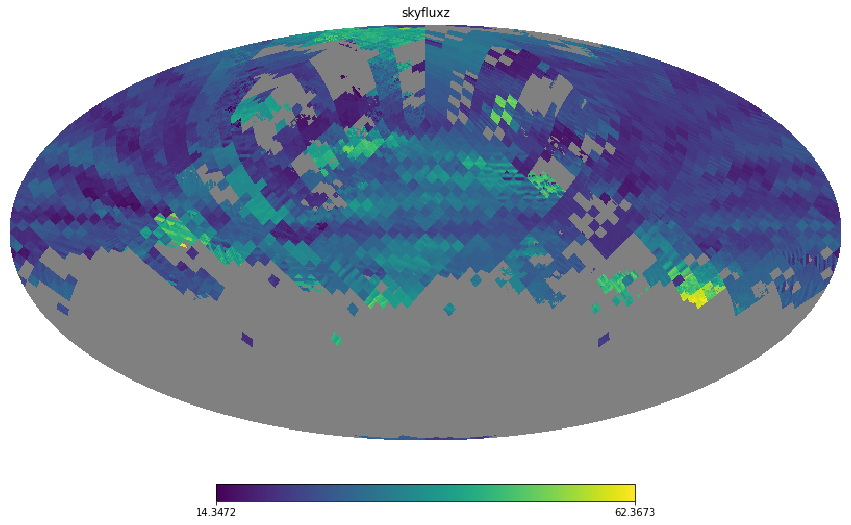

In [45]:
plot(sysPath,save=False,saveDir=mkdirPath)